In [7]:
import quandl
import zipline
import pandas as pd
from zipline.api import record, symbol, order_target_percent, order
from zipline import run_algorithm
from zipline.finance import commission, slippage
from datetime import datetime
import pytz
# silence warnings
import warnings
warnings.filterwarnings('ignore')


In [8]:
%matplotlib inline
%load_ext zipline


The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [9]:
%zipline --start=2000-1-1 --end=2018-1-1 
#-b quantopian-quandl


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 21:00:00+00:00,NaN,0.0,NaN,4.462677e-03,NaN,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,1,[],0.0
2000-01-04 21:00:00+00:00,0.0,0.0,NaN,8.945269e-03,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,2,[],0.0
2000-01-05 21:00:00+00:00,0.0,0.0,NaN,1.344787e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,3,[],0.0
2000-01-06 21:00:00+00:00,0.0,0.0,NaN,1.797056e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,4,[],0.0
2000-01-07 21:00:00+00:00,0.0,0.0,NaN,2.251343e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,5,[],0.0
2000-01-10 21:00:00+00:00,0.0,0.0,NaN,2.707658e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,6,[],0.0
2000-01-11 21:00:00+00:00,0.0,0.0,NaN,3.166009e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,7,[],0.0
2000-01-12 21:00:00+00:00,0.0,0.0,NaN,3.626405e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,8,[],0.0
2000-01-13 21:00:00+00:00,0.0,0.0,NaN,4.088856e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,9,[],0.0
2000-01-14 21:00:00+00:00,0.0,0.0,NaN,4.553371e-02,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,10,[],0.0


In [16]:
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()

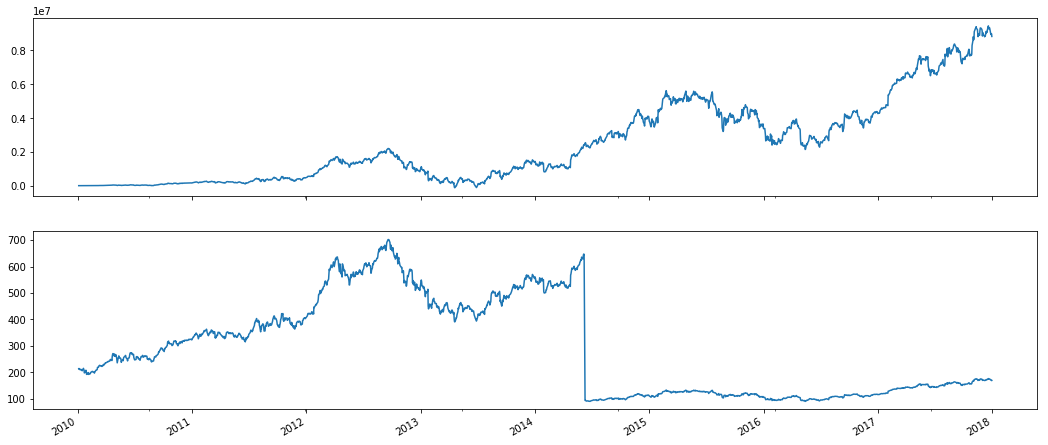

In [17]:
import matplotlib.pyplot as plt
# Set up the stuff for running the trading simulation
base_capital = 10000
start = datetime(2010, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2018, 1, 1, 0, 0, 0, 0, pytz.utc)
# run the trading algorithm and save the results in perf
perf = run_algorithm(start, end, initialize, base_capital, handle_data,
        bundle = 'quantopian-quandl', analyze=analyze)

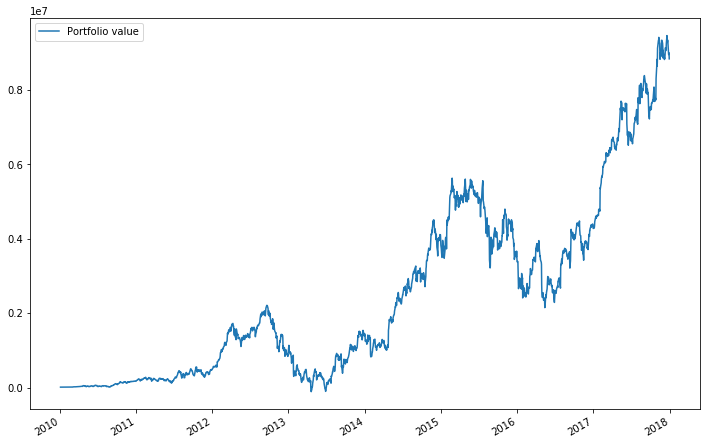

In [18]:
# Draw a nice plot of the value of our portfolio and save it
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
perf.portfolio_value.plot(label="Portfolio value")
# This is was generated by the run_algorithm
plt.legend()
plt.savefig('returns_appl.png')
